## Введение.

sweep_design представлен покетом для создания и анализа свип-сигналов. Кроме этого есть возможность его использования для анализа и создания других сигнлов.  

Построение свип-сигнла осуществляется по формуле: 

$$ S(t) = A(t)sin(\theta(t)+\theta_0) $$

где $t$ - время, которое меняется в пределах $[0, T]$ $A(t)$ - функция изменения амплитуды свип-сигнала, $\theta(t)$ - угловая развертка $\theta_0$ - начальная фаза 

$$ \theta(t) = 2\pi\int\limits_{0}^{t}F(\tau)d\tau $$

где $F(t)$ - зависимость частоты от времени

### Пример линейного свип-сигнала. 

In [8]:
import numpy as np

Далее построим последовательность отсчетов по времени. С временным интервалом от 0 до 10 секунд и шагом дискретизации 0.001 с.

In [2]:
T = 10
dt = 0.001
time = np.linspace(0, T, int(T/dt)+1)

Реализация функции, по которой строится свип-сигнал, описывается в модуле ```sweep_analysis.math_signals.math_uncalcsweep``` с помощью класса ```UncalculatedSweep```

In [24]:
from math_signals import UncalculatedSweep

Параметру t конструктора класса передается массив изменения времени time.

In [25]:
usw = UncalculatedSweep(t=time)

Таким образом, создается экземпляр нерассчитанного свип-сигнала.  
Чтобы получить свип сигнал, нужно вызвать экземпляр класса.  

In [26]:
sw = usw()

Извлечем данные из экземпляра класса Sweep с помощью метода ```get_data()```.
  
Он возвращает объект ```tuple```. Первым элементом, которого является последовательность ```npumpy.ndarray```, определяющая время,
  
а вторым элементом является последовательность ```numpyp.ndarray```, описывающая изменение амплитуды свип-сигнала.

Далее результат можно передать в метод ```plot``` модуля ```matplotlib.pyplot``` и увидеть изображение свип-сигнала.   

In [27]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sweep-signal')

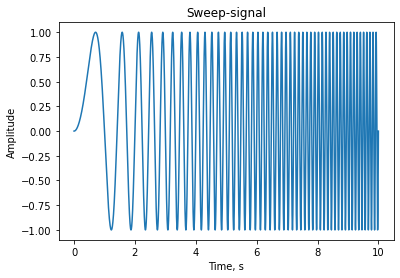

In [7]:
t_sw, a_sw = sw.get_data()
plt.plot(t_sw, a_sw)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Sweep-signal')

### Следующий пример.  

В качестве изменения частоты от времени возьмем функцию:

$$F(t) = sin(2\pi t/10)/2\cdot9+1 $$

где $t$ - время

Ниже она описана, как функция **f_t**.

В качестве изменения амплитуды от времени возьмём оконную функцию Tukey, по N отсчетам

$$ w[n] = 
\begin{cases} 
    \frac{1}{2}[1-cos(\frac{2\pi n}{\alpha N})], & 0 \le m < \frac{\alpha N}{2} 
    \\ 1, & \frac{\alpha N}{2} \le t < \frac{N}{2} 
    \\ w[N-n], & 0 \le n \le \frac{N}{2} 
\end{cases}   $$

где $n$ - отсчет, $N$ - всего отсчетов, $\alpha$ - коэффициент от 0 до 1 

Использовав функцию tukey из библиотеки scipy.
Указав количество отсчетов в виде длины массива по оси времени и взяв $\alpha$ = 0.3.

Ниже она описана, как функция **a_t**

In [8]:
from scipy.signal.windows import tukey

In [9]:
def f_t(time: np.ndarray) -> np.ndarray:
    return (np.sin(time*2*np.pi/10)+1)/2*9+1
def a_t(time: np.ndarray) -> np.ndarray:
    return tukey(time.size, alpha=0.2)

Далее построим последовательность отсчетов по времени. С временным интервалом от 0 до 50 секунд и шагом дискретизации 0.01 с.

In [10]:
T = 50
dt = 0.01
time = np.linspace(0, T, int(T/dt)+1)


Получение экземпляра класса осуществляется передачей трех параметров конструктору класса ```UncalculatedSweep```:


t - время,
  
f_t - функция зависимости частоты от времени,
  
a_t - функция зависимости амплитуды от времени.

In [11]:
usw = UncalculatedSweep(t=time, f_t=f_t, a_t=a_t)

Чтобы получить результат, описывающий свип, сигнал нужно вызвать экземпляр класса ```UncalculatedSweep```.

Результатом вызова является класс ```Sweep``` из модуля ```sweep_analysis.math_signals.math_sweep```

In [12]:
sw = usw()

Text(0.5, 1.0, 'Sweep-signal')

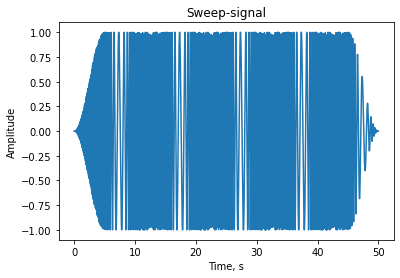

In [13]:
t_sw, a_sw = sw.get_data()
plt.plot(t_sw, a_sw)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Sweep-signal')

Также у экземпляра класса Sweep имеется свойство **f_t**.

Представленная экземпляром класса ```Relation``` из модуля sweep_analysis.math_signals.math_relation

Данный экземпляр также обладает методом ```get_data()```, который возвращает, тот же тип что и описанный выше метод get_data.

Аналогично можно построить график изменения частоты от времени. 

In [15]:
from math_signals.utility_sweeps import get_shuffle

In [17]:
sw = get_shuffle(time)

Text(0.5, 1.0, 'Frequency-Time')

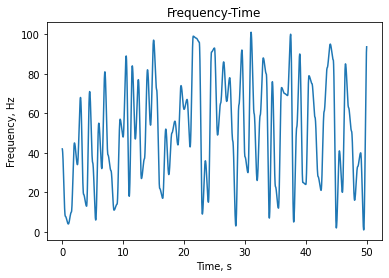

In [18]:
time_f_t, amp_f_t = sw.f_t.get_data()
plt.plot(time_f_t, amp_f_t)
plt.xlabel('Time, s')
plt.ylabel('Frequency, Hz')
plt.title('Frequency-Time')

Аналогично выше сказанному имеется свойство **a_t**, описывающие изменение амплитуды от времени.
  
Также можно построить график. 

Text(0.5, 1.0, 'Amplitude-Time')

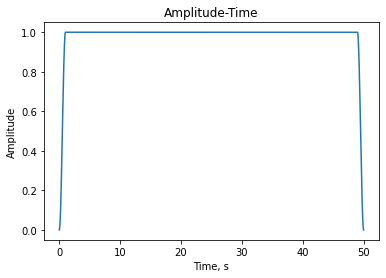

In [19]:
time_a_t, amp_a_t =sw.a_t.get_data()
plt.plot(time_a_t, amp_a_t)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Amplitude-Time')

***
## Построение свип-сигнала по априорным данным
  
Есть и другая возможность построения свип сигнала, используя **априорные данные**.
  
Для этого нужно воспользоваться классом ```ApriorUncalculatedSweep``` из модуля ```sweep_analysis.math_signals.math_uncalcsweep```.

Данный класс наследуется от ```UncalculatedSweep``` из того же модуля.

Отличие заключается в аргументах, которые он принимает для построения экземпляра класса. 

Первый аргумент отвечает за априорные данные, это может быть экземпляр класса: ```Relation```, ```Signal```, ```Spectrum``` или ```Sweep```. <br>
(Классы ```Signal```, ```Spectrum``` из модуля ```sweep_analysis.math_signals.math_signal```)
  
Второй аргумент, отвечает за метод (функцию), с помощью которой будут извлечены функции или последовательности изменения частоты от времени и амплитуды от времени.
  
Извлеченные функции далее будут переданы в суперкласс ```UncalculatedSweep```
  
Дальнейший вызов экземпляра класса  ```ApriorUncalculatedSweep``` аналогичен вызову экземпляра класса ```UncalculatedSweep```, который возвращает экземпляр класса ```Sweep```
  
Рассмотрим пример получения свип-сигнала из импульса Рикера. Также воспользуемся функцией получение сигнала из библиотеки ```scipy```.

In [4]:
from scipy.signal import ricker
from math_signals import Signal

In [11]:
T_ricker = 1
t_ricker = np.linspace(0, T_ricker, int(T_ricker/dt)+1)
rick = ricker(t_ricker.size, a = 1)
ricker_signal = Signal(t_ricker, rick)

In [19]:
t_r2, a_r2 = ricker_signal.get_data()
plt.plot(t_r2, a_r2)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Ricker signal')


NameError: name 'plt' is not defined

In [20]:
from math_signals import ApriorUncalculatedSweep

In [21]:
usw2 = ApriorUncalculatedSweep(t = time, aprior_data=ricker_signal)
sw2 = usw2()

Параметр ftat_method опциональный параметр. По умолчанию используется функция ```simple_freq2time``` из модуля ```sweep_analysis.math_signal.defaults.sweep_methods```
```python:
def simple_freq2time(spectrum: 'Spectrum') -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    f, A = spectrum.get_amp_spectrum().get_data()
    n_spec = A ** 2
    nT = np.append([0.], ((n_spec[1:]+n_spec[:-1])/(f[1:]-f[:-1])).cumsum())
    coef = integrate.trapz(n_spec, f)
    a_t = sqrt(coef*2)*np.ones(len(nT))
    return nT, f, a_t
``` 

Text(0.5, 1.0, 'Sweep-signal')

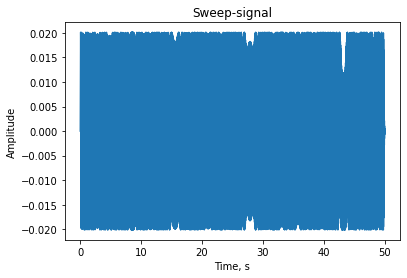

In [32]:
t_sw2, a_sw2 = sw2.get_data()
plt.plot(t_sw2, a_sw2)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Sweep-signal')


Результатом является нелинейный свип-сигнал, амплитудный спектр которого схож с амплитудным спектром передоваемого спектра сигнала Рикера.
  
Убедится в этом можно воспользовавшись выполнением последовательностей функций:

1. К экземплярам классов ```Sweep``` и ```Signal```, которыми являются **sw2** и **aprior_signal**, можно вызвать метод ```get_spectrum()```, который возращает экземпляр класса Spectrum.

2. Из экземпляра класса Spectrum с помощью функции ```get_amp_spectrum()``` можно получить экземпляр класса ```Relation```, описывающий амплитудный спектр сигнала.

3. И в конце, как в предыдущих примерах, извлечь данные с помощью метода ```get_data()``` и передать результат методу ```plot()```     

Text(0.5, 1.0, 'Amplitude Spectrum')

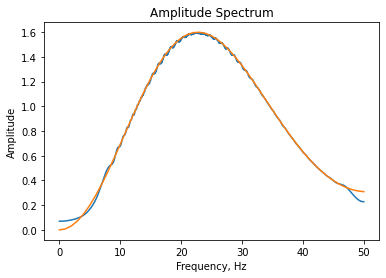

In [33]:
norm_sweep = sw2.get_norm()
freq_f_t2, amp_f_t2 = sw2.get_spectrum().get_amp_spectrum().get_data()
plt.plot(freq_f_t2, amp_f_t2)
freq_f_t3, amp_f_t3 = ricker_signal.get_spectrum().get_amp_spectrum().get_data()
plt.plot(freq_f_t3, amp_f_t3)
plt.xlabel('Frequency, Hz')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')


Входной аргумент ```ApriorUncalculatedSweep``` **ftat_method** отвечает за то, как будут вычислены функции изменения частоты от времени и амплитуды от времени.
  
Это может быть функция определенная пользователем, которая возращает желаемый результат. 
  
Входные параметрами функции является объект класса ```Spectrum```, а выходными параметрами явлется объект ```tuple```, на первом месте которого новая временная последовательность. На втором и третьем местах отвечающая ей функции или последовательности измения частоты и амплитуды.

***
## Дополнительные возможности.

Выше приведенные примеры описывают небольшую математическую часть модуля ```sweep```. Также возможны все математические операции (сложение, умножение и т.д.) над экземплярами классов и другие возможности. Более подробно смотрите документацию.

В конце добавлю, что есть расширение математической части, которое представляет описание получаемых результатов. Также написан небольшой GUI для визуализации, анализа и работы с данными.

Ниже приведен их пример.  

Для присвоения имен и категорий созданы классы, повторяющие поведение вышеописанных классов и являющихся композицией этих классов и классов из пакета header_signals.

Класс ```ComposedRelation``` расположенный в ```sweep.compose_signals.c_relation``` является аналогичным классу ```Relation``` вышеописанному. Отличие заключается в том, что помимо переменных x и y конструктор класса принимает имя - name и категорию - category, являющиеся строками. Они используются в дальнейшем для описания и оформления. 
Аналогичное описание для следeющих классов:
Класс ```ComposedSignals``` расположенный в ```sweep.compose_signals.c_signal``` является аналогичным классу ```Signal``` вышеописанному.
Класс ```ComposedSpectrum``` расположенный в ```sweep.compose_signals.c_signal``` является аналогичным классу ```Spectrum``` вышеописанному.
Класс ```ComposedRelation``` расположенный в ```sweep.compose_signals.c_sweep``` является аналогичным классу ```Sweep``` вышеописанному. 

Рассмотрим ниже пример создание экземпляра класса ```ComposedSignals```.
<br>
По аналогии с классом Signal мы передаем переменные t_ricker и rick, полученные на предыдущем этапе, и передаем желаемое имя и категорию в конструктор класса ```ComposedSignal```.

In [2]:
from named_signals import NamedSignal

In [13]:
named_ricker = NamedSignal(t_ricker, rick, 'My fist Ricker signal', 'signal')

Классы ComposedRelation и унаследованные от него другие классы: ComposedSignal, ComposedSpectrum и ComposedSweep, на в ход могут принимать разное количество параметров и разных типов, более подробно смотрите документацию. 
Пример создание того же сигнала Рикер, но немного по-другому, приведен ниже. 

In [14]:
named_ricker_2 = NamedSignal(ricker_signal) # recker_signal полученный на предыдущем этапе, являющийся экземпляром класса Signal

Отличие заключается в том, что в этот раз передали один параметр.  
И отличие заключается в присвоенных именах. 

In [15]:
print(named_ricker)
print('=============================================================')
print(named_ricker_2)

My fist Ricker signal
named_ricker_2


Также сделаем и для уже полученного свип-сигнала.

In [28]:
from named_signals import NamedSweep

In [29]:
sin_freq_sweep = NamedSweep(sw)
ricker_sweep = NamedSweep(sw2)

Теперь посмотрим для чего это было сделано.  
  
Из модуля viewrelation.view импортируем две функции get_viewer_ipywidgets_bokeh  и get_viewer_ipywidgets_matplotlib.  
Обе функции возвращают экземпляры классов по созданию окон визуализации данных в Jupyter Notebook, JupyterLab и других схожих блокнотах.  
(В некоторых блокнотах может работать некорректно) (Некорректно работает в VSCode, лучше запускать через браузер.)  
  
Возвращаемый объект get_viewer_ipywidgets_bokeh строит окно с помощью библиотек ipywidgets и bokeh.  
Возвращаемый объект get_viewer_ipywidgets_matplotlib строит окно с помощью библиотек ipywidgets и matplotlib.  
  
Можно создать свои классы для построения изображения (Смотрите документацию).  

In [29]:
from viewrelation.view import get_viewer_ipywidgets_bokeh

ImportError: cannot import name 'Figure' from 'viewrelation.commonview.protocols.figureprotocols' (/home/vladislav/programming/studying/python/sweep_design/viewrelation/commonview/protocols/figureprotocols.py)

In [ ]:
bokeh_view = get_viewer_ipywidgets_bokeh()

In [ ]:
from loguru import logger

In [ ]:
logger.add('log/test.log')

In [ ]:
bokeh_view.add(sin_freq_sweep)
bokeh_view.add(ricker_sweep)
bokeh_view.add(named_ricker)
bokeh_view.add(named_ricker_2)

In [ ]:
bokeh_view.show()

## Заключение.
  
В документации написано более подробное использование модулей, классов и их фукций и методов.  
  
Также в модуле есть возможность изменение атрибутов классов для измения поведения и вычислений. 
  
Если их не достаточно, ни что не мешает переписать их или дополнить.  